In [1]:
import Queue
import ChainedList
import ZFSearchMetagraph
#import ZFSearchMetagraphBITSET
#Ok this time, I promise!

In [2]:
def BFS_shortest_path_with_edge_labels(G, start_vertex, end_vertex, numVertices):
    # Input: G is a graph, start_vertex and end_vertex are vertices
    # Output: a list of vertices, in order, forming a shortest path from start to end
    # Implementation: some sort of BFS thing using a queue
    start = FrozenBitset(capacity=numVertices)
    end = FrozenBitset(Bitset(end_vertex).union(Bitset(capacity=numVertices)))
    
    zero_Bitset = FrozenBitset(capacity=numVertices)
    
    meta_vertices = [] #OUTPUT JUST THE META VERTICES RETURN LATER
    added_vertices = [] #OUTPUT JUST ADDED VERTICES RETURN LATER
    

    vertices_to_visit_queue   = Queue.Queue()
    visited_list              = ChainedList.ChainedList()
    shortest_path             = [] # Initialize a list for the path to be returned at the end

    # line below is just for profiling purposes!
    G.num_vertices_checked = 0
    
    vertices_to_visit_queue.put(start)
    visited_list.add_with_parent_and_edge(start,zero_Bitset,zero_Bitset)

    while not vertices_to_visit_queue.empty():
        curVertex = vertices_to_visit_queue.get()
        for vertex_edge_pair in G.neighbors_with_edges(curVertex):
            vertex, edge = vertex_edge_pair

            if vertex not in visited_list:
                vertices_to_visit_queue.put(vertex)
                visited_list.add_with_parent_and_edge(vertex,curVertex,edge)

            if vertex == end:
                # Reached target vertex, so begin back-chaining the path now
                current_vertex = [end,zero_Bitset]
                at_start_of_path = False
                while not at_start_of_path:
                    shortest_path.append(current_vertex)
                    meta_vertices.append(current_vertex[0])
                    added_vertices.append(current_vertex[1])
                    previous_vertex = visited_list.get_parent(current_vertex[0])
                    if previous_vertex[0]== zero_Bitset:
                        at_start_of_path = True
                    else:
                        current_vertex = previous_vertex

                shortest_path.reverse() # Reverse the path to get the correct traversal order
                added_vertices.remove(zero_Bitset)
                meta_vertices.reverse()
                added_vertices.reverse()
                return meta_vertices, added_vertices

In [3]:
def BFS_shortest_path_with_edge_labels_OLD(G, start_vertex, end_vertex):
    # Input: G is a graph, start_vertex and end_vertex are vertices
    # Output: a list of vertices, in order, forming a shortest path from start to end
    # Implementation: some sort of BFS thing using a queue
    start = frozenset(start_vertex)
    end = frozenset(end_vertex)
    
    meta_vertices = [] #OUTPUT JUST THE META VERTICES RETURN LATER
    added_vertices = [] #OUTPUT JUST ADDED VERTICES RETURN LATER
    

    vertices_to_visit_queue   = Queue.Queue()
    visited_list              = ChainedList.ChainedList()
    shortest_path             = [] # Initialize a list for the path to be returned at the end

    # line below is just for profiling purposes!
    G.num_vertices_checked = 0
    
    vertices_to_visit_queue.put(start)
    visited_list.add_with_parent_and_edge(start,None,None)
    
    while not vertices_to_visit_queue.empty():
        curVertex = vertices_to_visit_queue.get()
        for vertex_edge_pair in G.neighbors_with_edges(curVertex):
            vertex, edge = vertex_edge_pair

            if vertex not in visited_list:
                vertices_to_visit_queue.put(vertex)
                visited_list.add_with_parent_and_edge(vertex,curVertex,edge)

            if vertex == end:
                # Reached target vertex, so begin back-chaining the path now
                current_vertex = [end,None]
                at_start_of_path = False
                while not at_start_of_path:
                    shortest_path.append(current_vertex)
                    meta_vertices.append(current_vertex[0])
                    added_vertices.append(current_vertex[1])
                    previous_vertex = visited_list.get_parent(current_vertex[0])
                    if previous_vertex[0]== None:
                        at_start_of_path = True
                    else:
                        current_vertex = previous_vertex

                shortest_path.reverse() # Reverse the path to get the correct traversal order
                added_vertices.remove(None)
                meta_vertices.reverse()
                added_vertices.reverse()
                return meta_vertices, added_vertices

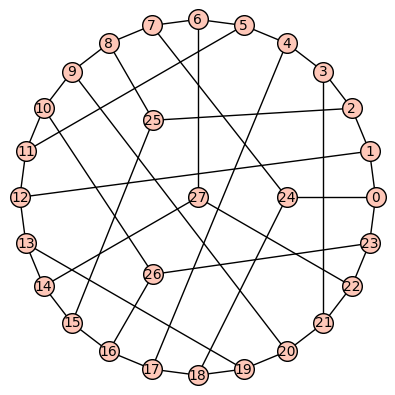



This graph has 28 vertices
Longest shortest path possible: 4


In [7]:
# Initialize a test graph and the associated ZFSearchMetagraph
#H = graphs.CubeGraph(5); H.relabel()
#H = graphs.PetersenGraph()
H = graphs.CoxeterGraph()       # DNF/DNF/1,284sec/339sec/220sec
#H = graphs.RobertsonGraph()     # DNF
#H = graphs.HeawoodGraph()       # 1.46/~1.20sec/1.03sec/0.22sec/0.16sec/0.12sec
#H = graphs.BrinkmannGraph()     # DNF/DNF/66.5sec/43.3sec/29.81sec/25.97sec
#H = graphs.HoffmanGraph()       # ~19sec/~13.7sec/2.57sec/2.00sec/1.6sec
#H = graphs.ClebschGraph()       # DNF/36.3sec/12.8sec/7.8sec/6.7sec/4.8sec/4.22sec/2.90sec
#H = graphs.DesarguesGraph()     # 14.56sec/8.00sec/5.6sec
#H = graphs.DodecahedralGraph()  # ~25.9sec/~8.9sec/~4.2sec/3.02sec/2.90sec/2.12sec/1.07sec/0.80sec
#H = graphs.HoffmanGraph().complement()
#H = graphs.CompleteGraph(16)
#H = graphs.RandomTree(22)
#H = graphs.PathGraph(10000)
if H.num_verts() < 50:
    H.show()
#metaGraph = ZFSearchMetagraphBITSET.ZFSearchMetagraphBITSET(H)
metaGraph = ZFSearchMetagraph.ZFSearchMetagraph(H)
print "\n"
print "This graph has", H.num_verts(), "vertices"
print "Longest shortest path possible:", H.diameter()

In [9]:
%time X = BFS_shortest_path_with_edge_labels_OLD(metaGraph, [], H.vertices())

print X[1]
print "Total number of vertices checked for forcing: ", metaGraph.num_vertices_checked

CPU times: user 2min 7s, sys: 144 ms, total: 2min 7s
Wall time: 2min 7s
[9, 2, 22, 25, 24, 6, 26, 16, 10]
Total number of vertices checked for forcing:  39329590


In [6]:
# http://doc.sagemath.org/html/en/thematic_ttorials/profiling.html
%prun BFS_shortest_path_with_edge_labels(metaGraph, [], H.vertices())

TypeError: BFS_shortest_path_with_edge_labels() takes exactly 4 arguments (3 given)